In [1]:
from IPython import display
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [8]:
def plotRecord(pickle_file):
    with open("records/" + pickle_file, 'rb') as f:
        records = pickle.load(f)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(10,8))
    plt.plot(records["disc"], label='discriminitive loss')
    plt.plot(records["gen"], label='generative loss')
    plt.plot(records["acc_real"], label='discriminator accuracy on real images')
    plt.plot(records["acc_gen"], label='discriminator accuracy on generated images')
    plt.plot(records["acc_test"], label='discriminator accuracy on test set images')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim([0, 1.5])
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def plotOriginalImages(image_class):
    if image_class != None:
        samples = 0
        sample_indices = []
        while samples < 32:
            sample_index = np.random.randint(0, X_train.shape[0])
            if y_train[sample_index] == image_class:
                sample_indices.append(sample_index)
                samples += 1
    else:
        sample_indices = np.random.randint(0, X_train.shape[0], 32)

    plt.figure(figsize=(10, 6))
    f = 0
    for index in sample_indices:
        f += 1
        plt.subplot(4, 8, f)
        img = X_train[index,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
def plotGeneratedImages(generator_file):
    generator = load_model("networks/" + generator_file)
    
    noise = np.random.uniform(0,1,size=[80, 100])
    for image_class in range(10):
        noise[8 * image_class:8 * (image_class + 1), 10 * image_class:10 * (image_class + 1)] = 0
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 14))
    for i in range(generated_images.shape[0]):
        plt.subplot(10, 8, i+1)
        img = generated_images[i,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
# image_class = 0

# for epochs in range(50, 151, 50):
#     save_file = 'gen' + str(image_class) + '-' + str(epochs) + '.h5'
#     print "Class", image_class, "after", epochs, "epochs:"
#     plotGeneratedImages(save_file)

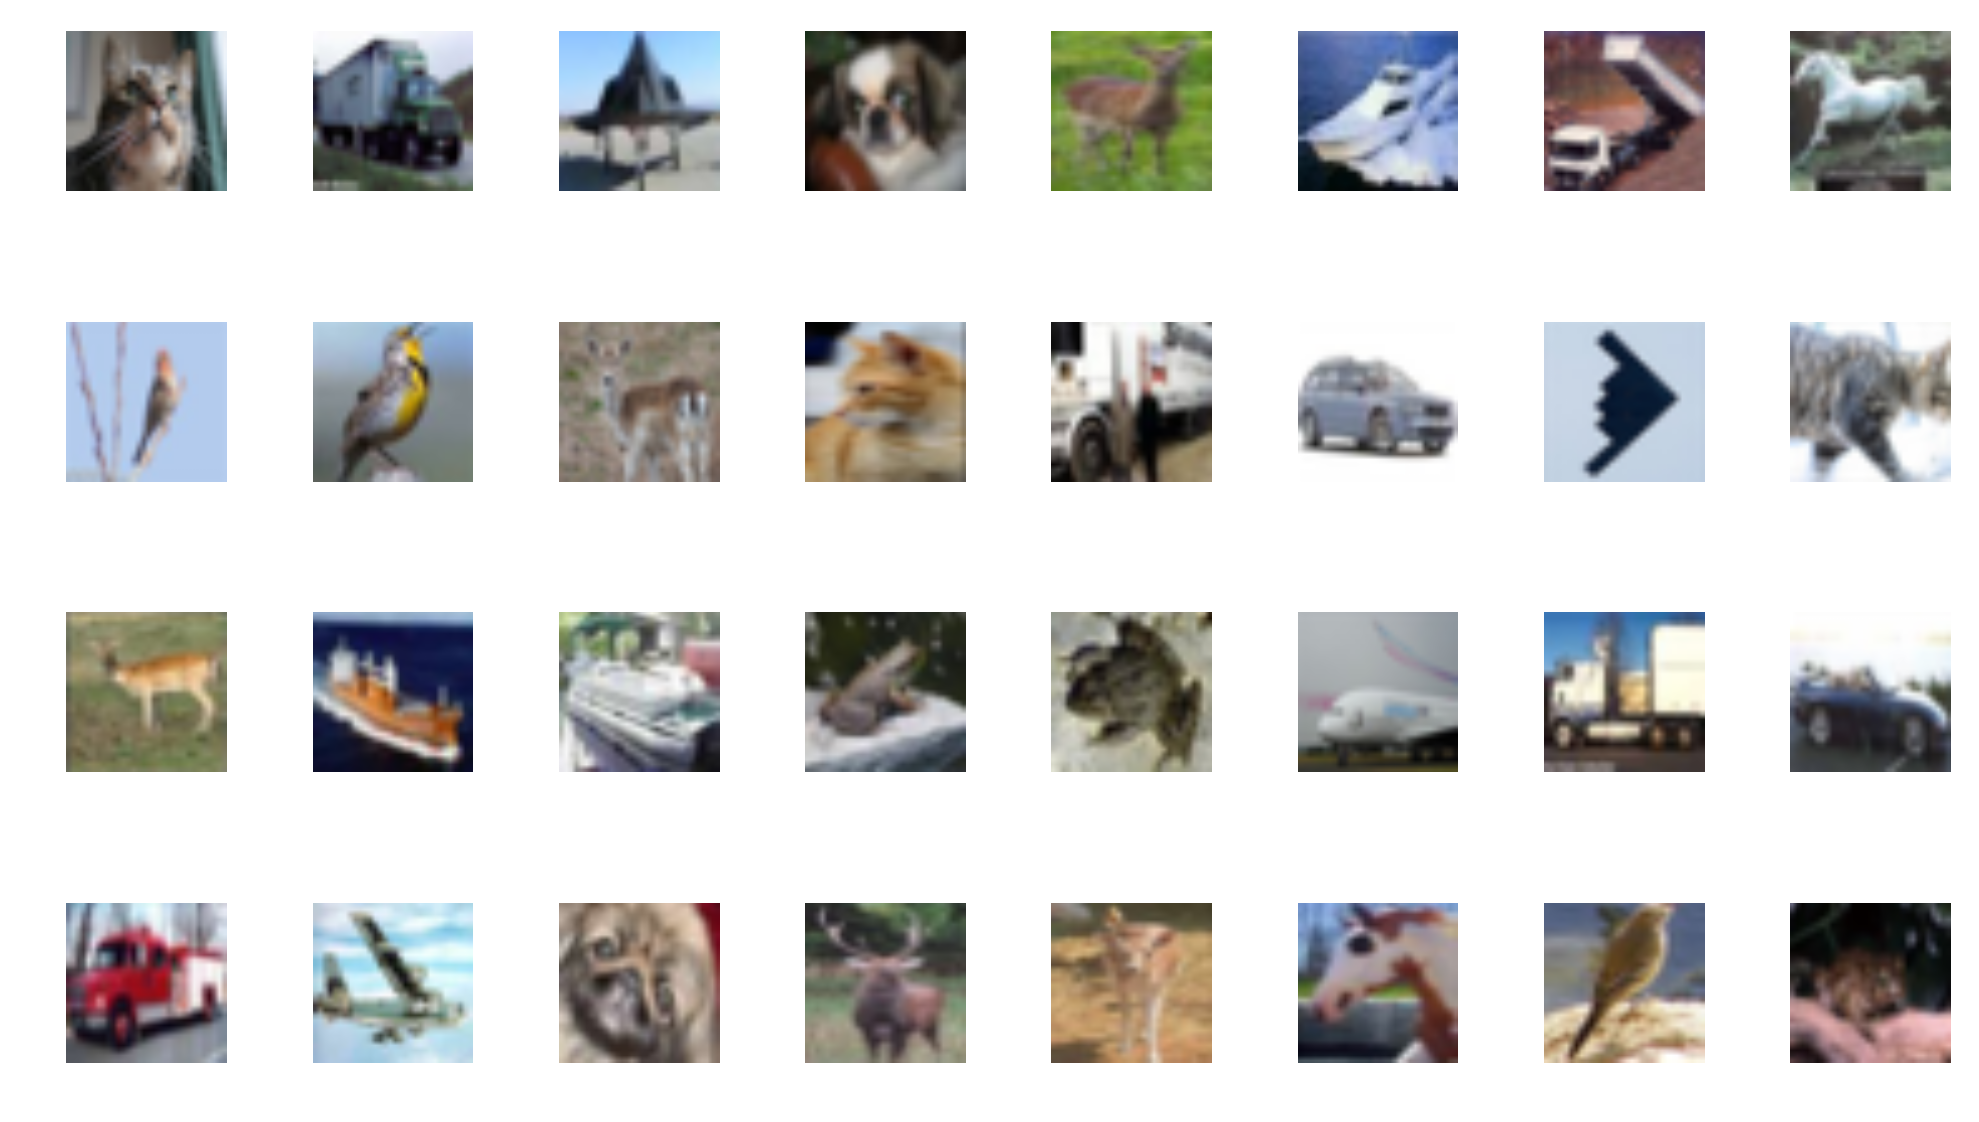

In [29]:
plotOriginalImages(None) # Original CIFAR-10 images

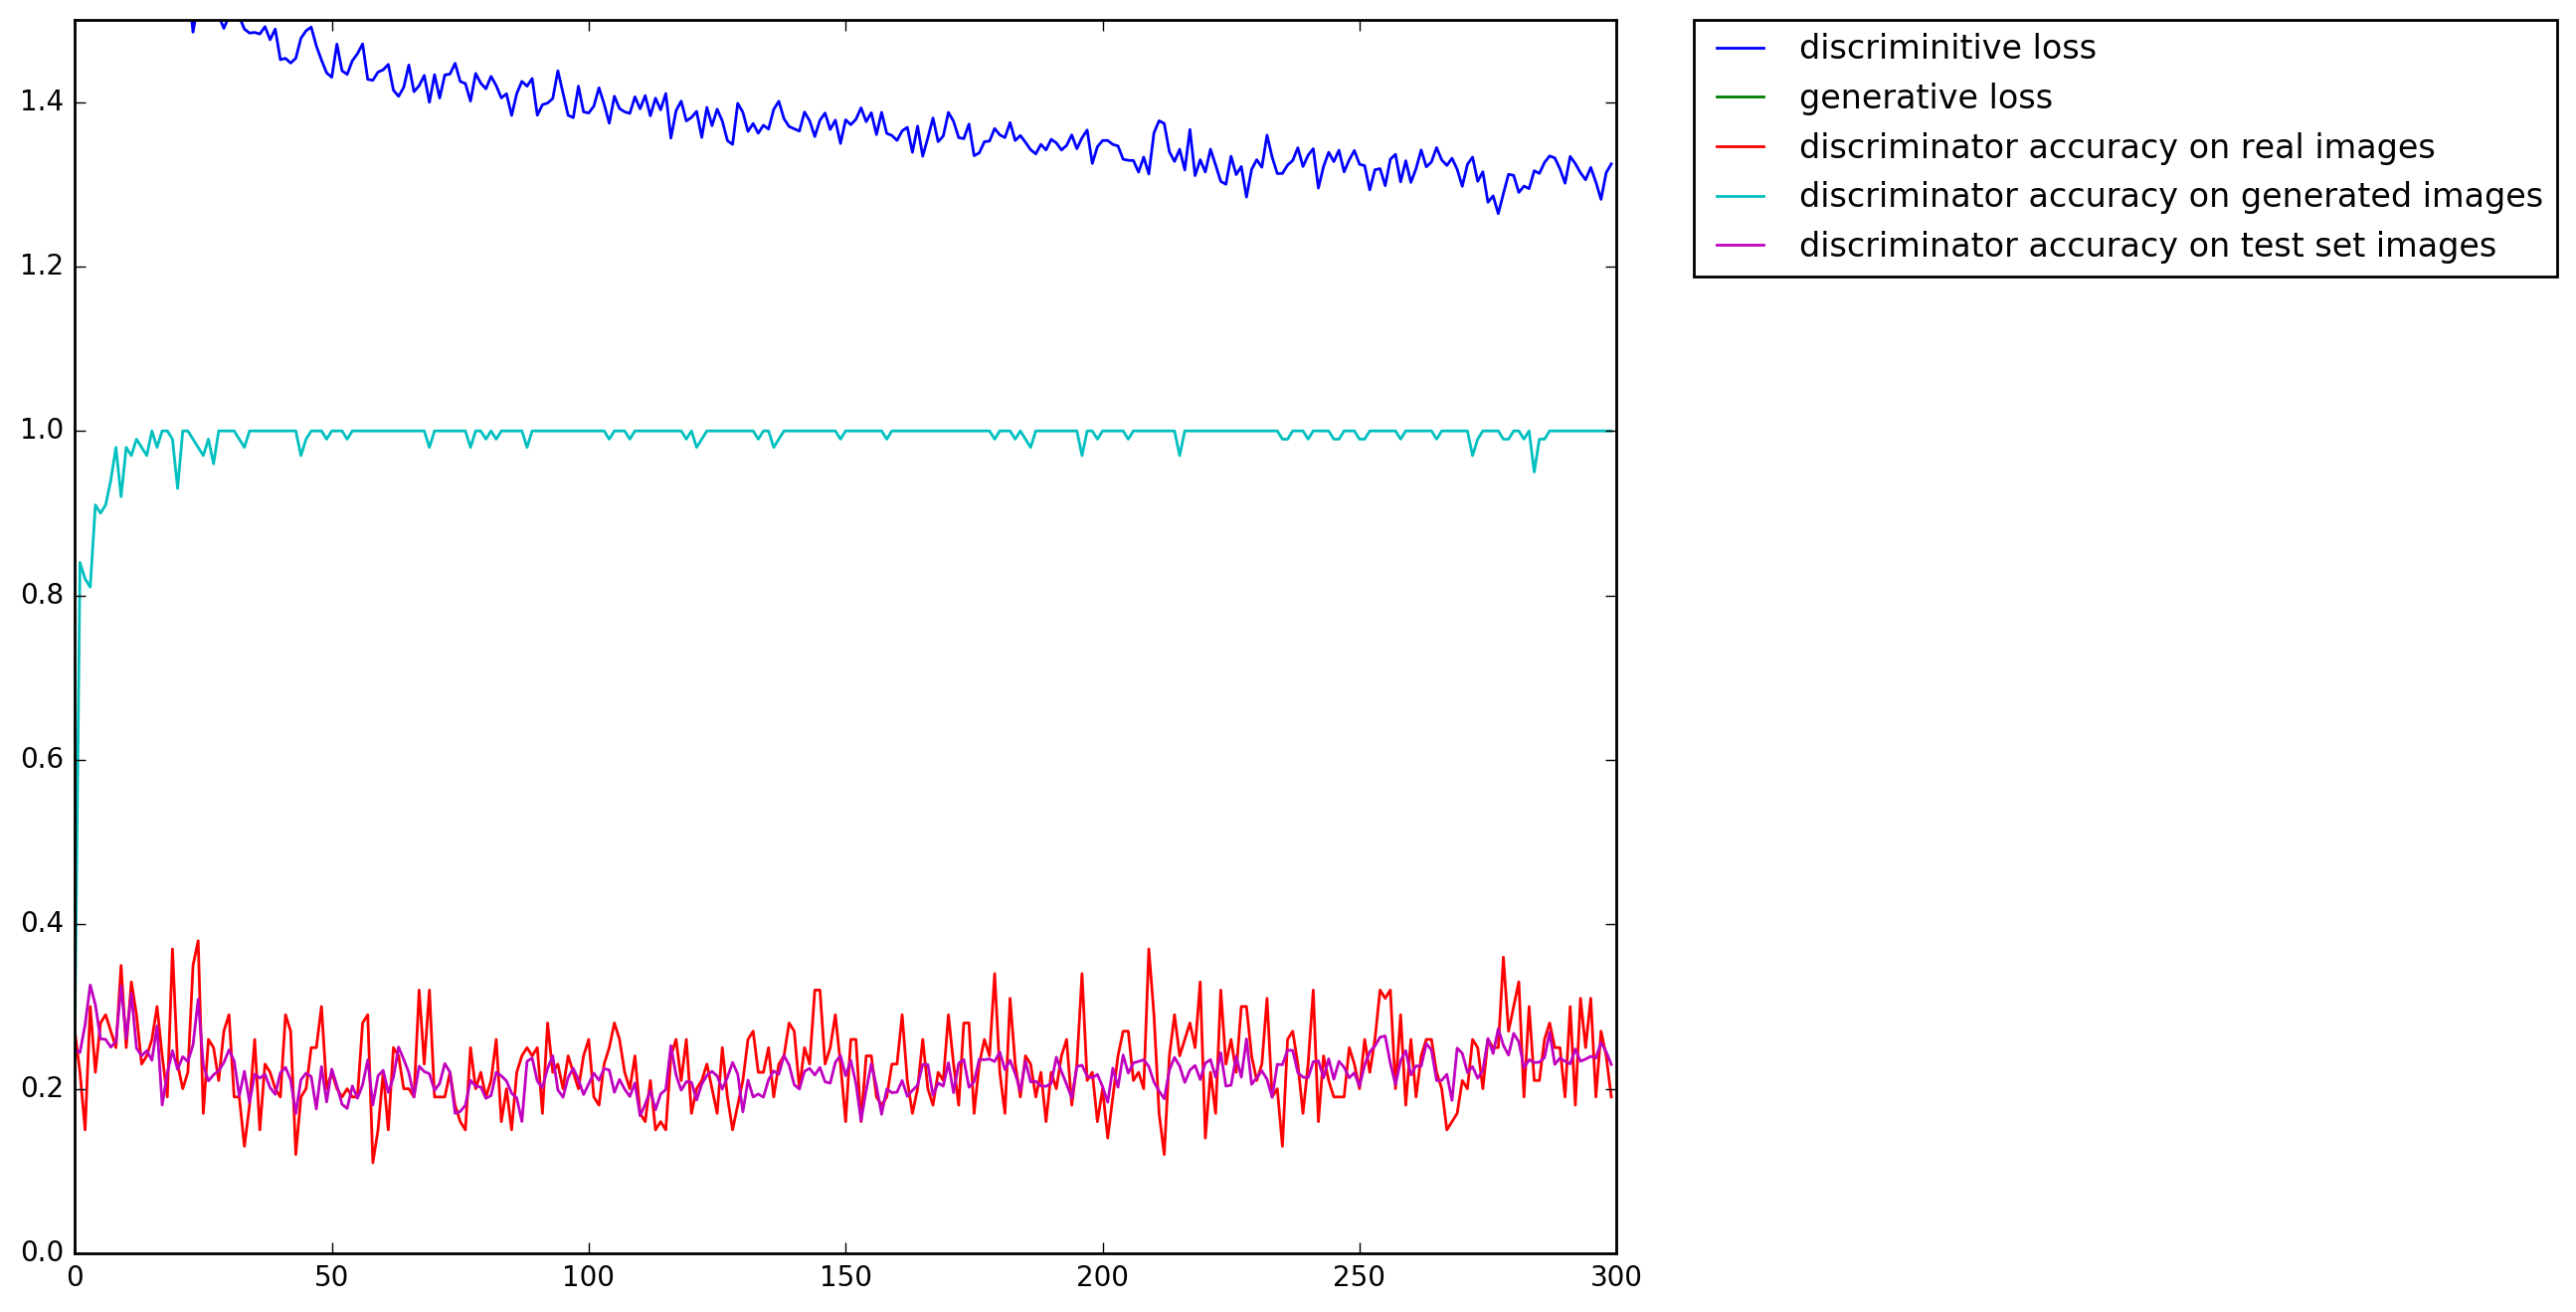

In [9]:
plotRecord('record-300.pickle')

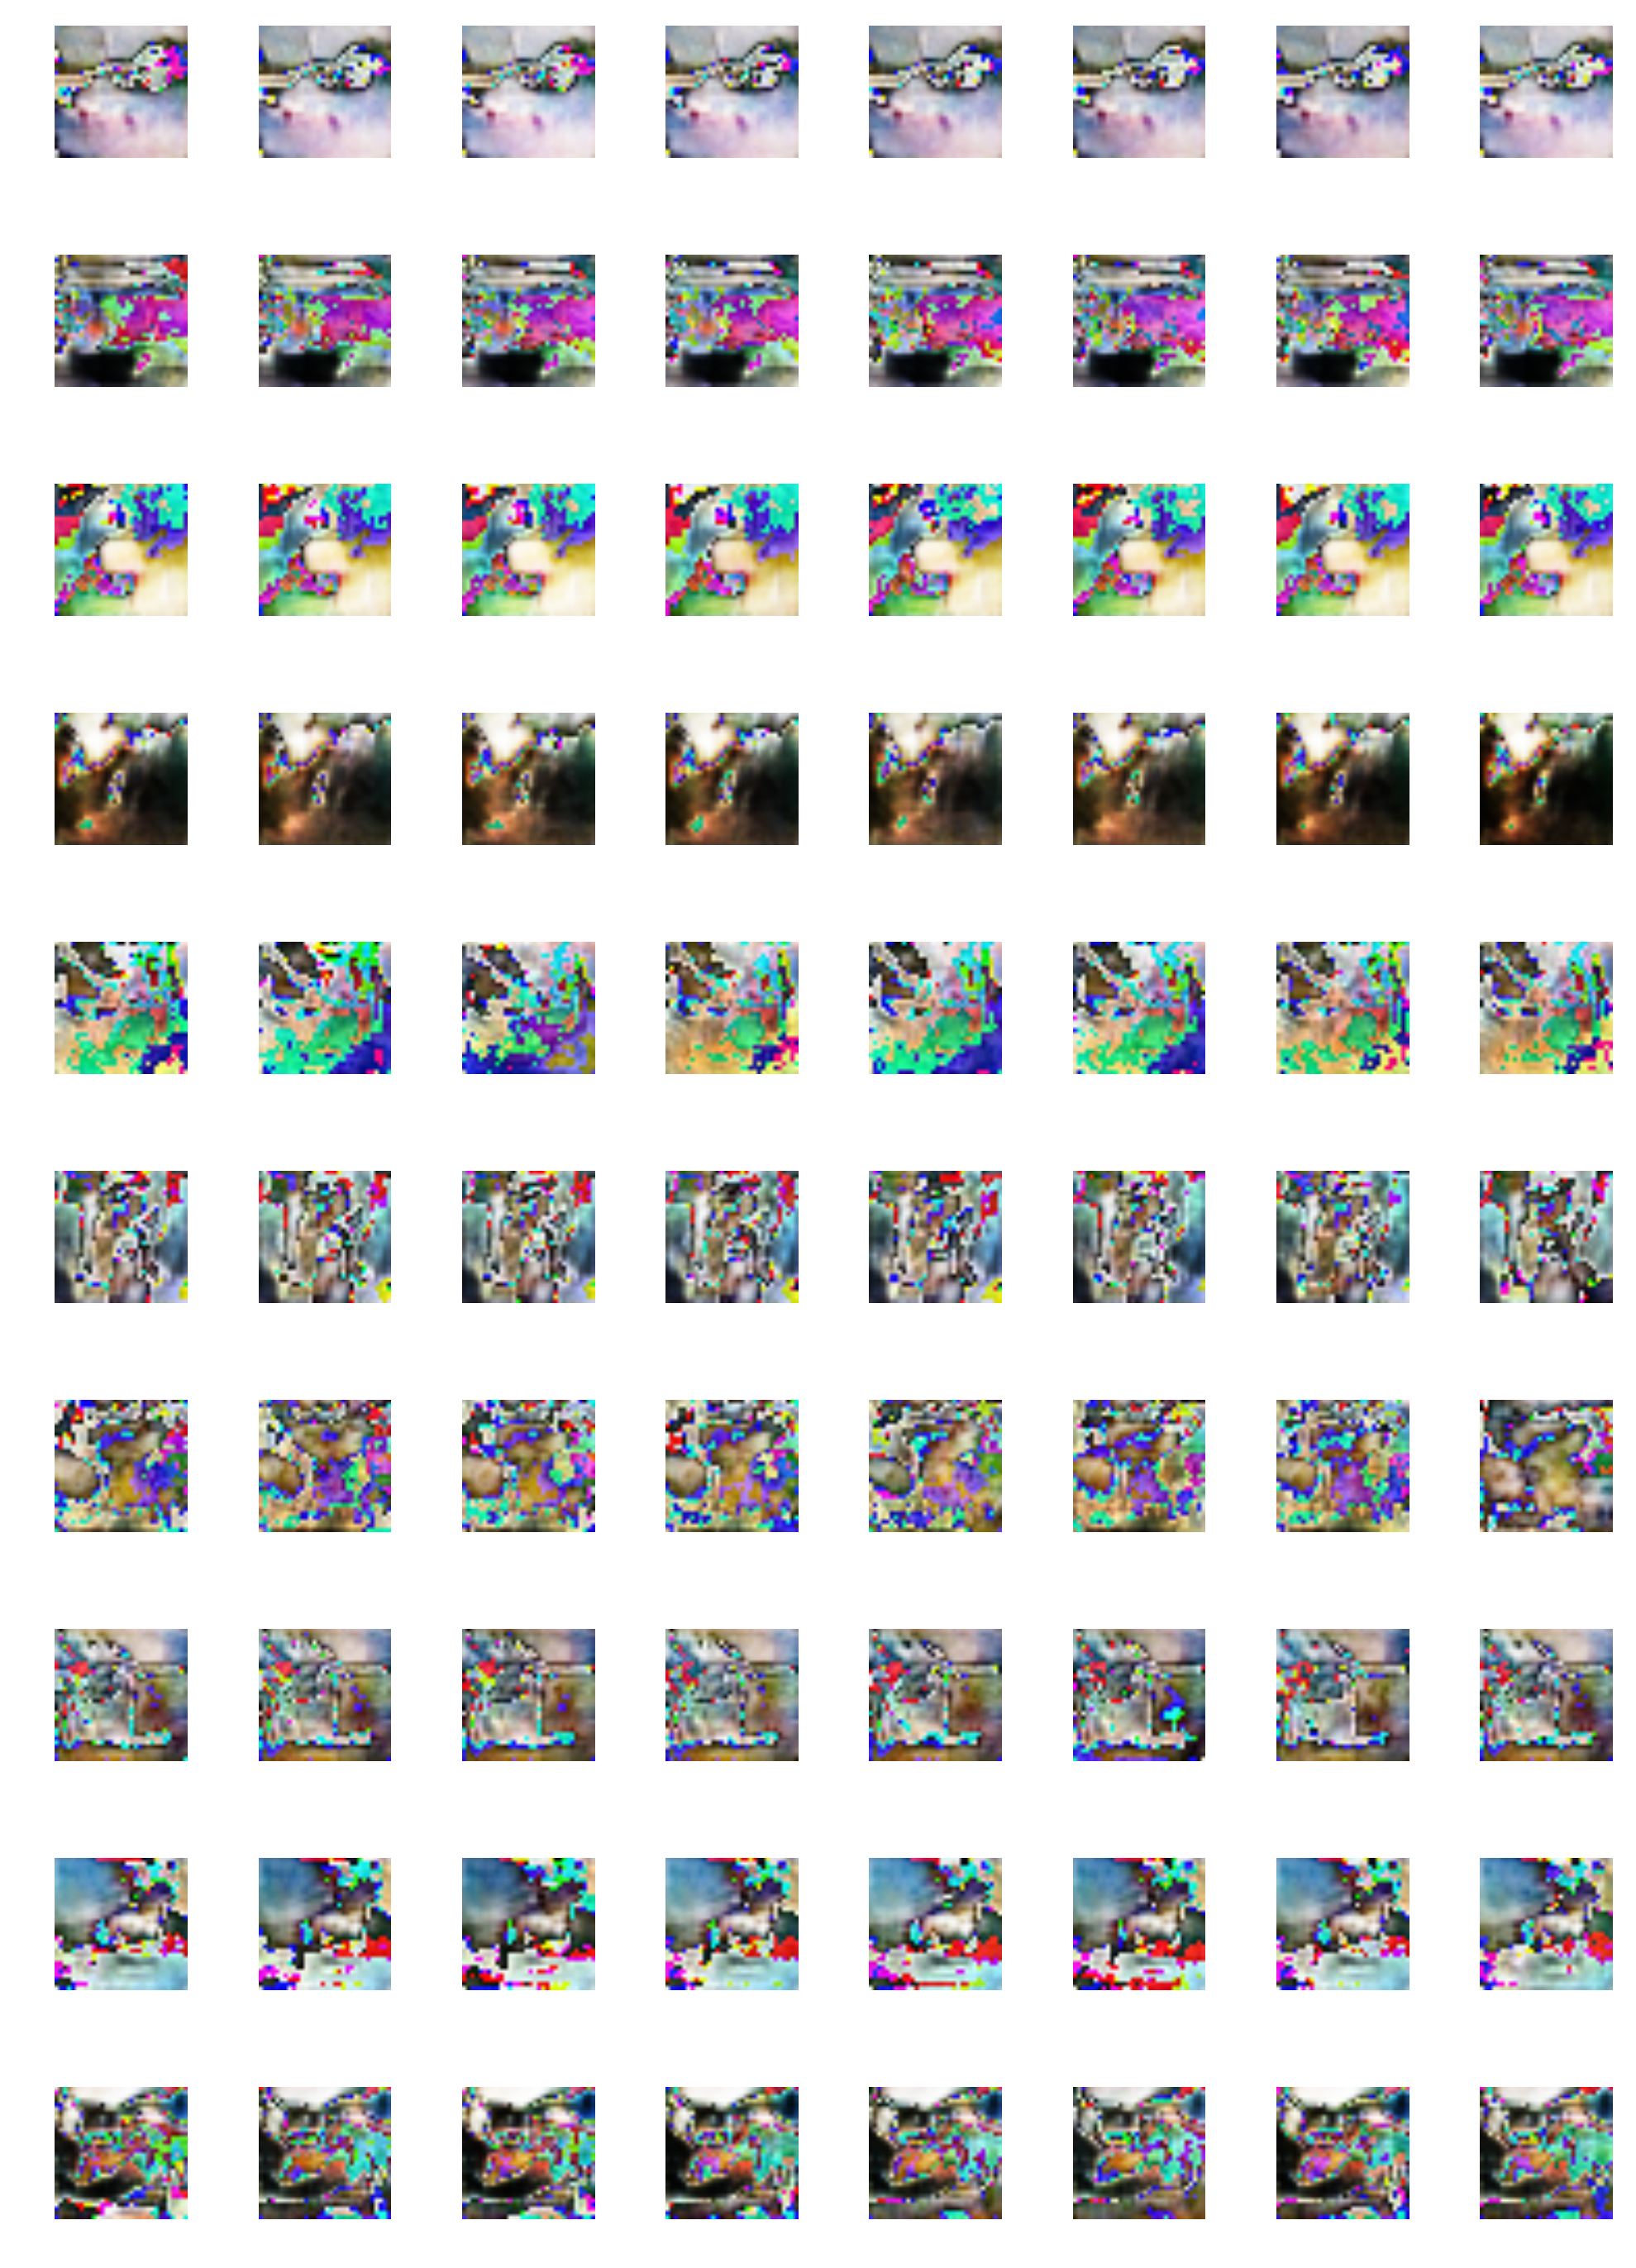

In [7]:
plotGeneratedImages('generator-300.h5')